In [103]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-student-performance-from-game-play/sample_submission.csv
/kaggle/input/predict-student-performance-from-game-play/train_labels.csv
/kaggle/input/predict-student-performance-from-game-play/train.csv
/kaggle/input/predict-student-performance-from-game-play/test.csv
/kaggle/input/predict-student-performance-from-game-play/jo_wilder/competition.cpython-37m-x86_64-linux-gnu.so
/kaggle/input/predict-student-performance-from-game-play/jo_wilder/__init__.py


In [104]:
df1 = pd.read_csv('/kaggle/input/predict-student-performance-from-game-play/train.csv', nrows=10000)

In [105]:
df1.memory_usage(deep=True)

Index                128
session_id         80000
index              80000
elapsed_time       80000
event_name        700443
name              638871
level              80000
page               80000
room_coor_x        80000
room_coor_y        80000
screen_coor_x      80000
screen_coor_y      80000
hover_duration     80000
text              525518
fqid              567025
room_fqid         847275
text_fqid         569413
fullscreen         80000
hq                 80000
music              80000
level_group       614050
dtype: int64

In [106]:
traindf = pd.read_csv('/kaggle/input/predict-student-performance-from-game-play/train.csv', chunksize=100000)

In [107]:
output = pd.DataFrame()
for chunk in traindf: 
    #categories = ['session_id','name', 'event_name', 'level', 'elapsed_time','fqid','room_fqid', 'text', 'text_fqid', 'page', 'hover_duration', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y','level_group']
    categories = ['session_id','name', 'event_name', 'level','level_group', 'elapsed_time', 'page']
    details=chunk[categories]
    details['count']=1
    summary=details.groupby(categories).sum().reset_index()
    output = output.append(summary, ignore_index=True)
    display(output.head())
    break

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,session_id,name,event_name,level,level_group,elapsed_time,page,count
0,20090312433251036,basic,notebook_click,6,5-12,354779,1.0,1
1,20090312433251036,basic,notebook_click,15,13-22,1244575,4.0,1
2,20090312433251036,basic,notebook_click,17,13-22,1495326,4.0,1
3,20090312433251036,basic,notebook_click,17,13-22,2663486,4.0,1
4,20090312433251036,basic,notebook_click,18,13-22,2938963,5.0,1


In [108]:
output.sort_values('count')

,session_id,name,event_name,level,level_group,elapsed_time,page,count
0,20090312433251036,basic,notebook_click,6,5-12,354779,1.0,1
1492,20100013473331852,prev,notebook_click,7,5-12,882915,1.0,1
1491,20100013473331852,open,notebook_click,21,13-22,3616308,6.0,1
1490,20100013473331852,open,notebook_click,21,13-22,3561926,6.0,1
1489,20100013473331852,open,notebook_click,19,13-22,3216863,5.0,1
...,...,...,...,...,...,...,...,...
743,20100008103581056,open,notebook_click,10,5-12,1734799,2.0,1
744,20100008103581056,open,notebook_click,11,5-12,1850418,3.0,1
745,20100008103581056,open,notebook_click,14,13-22,2538542,4.0,1
739,20100008103581056,open,notebook_click,6,5-12,1201753,1.0,1


In [109]:
df1.dtypes


session_id          int64
index               int64
elapsed_time        int64
event_name         object
name               object
level               int64
page              float64
room_coor_x       float64
room_coor_y       float64
screen_coor_x     float64
screen_coor_y     float64
hover_duration    float64
text               object
fqid               object
room_fqid          object
text_fqid          object
fullscreen          int64
hq                  int64
music               int64
level_group        object
dtype: object

In [110]:
df=chunk.drop(['index'],axis=1, inplace=True)


In [111]:

df1.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4


In [112]:
df1['level_group'].unique()

array(['0-4', '5-12', '13-22'], dtype=object)

In [113]:
#df1.drop(['fullscreen','hq', 'music'], axis=1, inplace=True)
#df1.head()

In [114]:
df1.isna().sum() / len(df1) 


session_id        0.0000
index             0.0000
elapsed_time      0.0000
event_name        0.0000
name              0.0000
level             0.0000
page              0.9766
room_coor_x       0.1015
room_coor_y       0.1015
screen_coor_x     0.1015
screen_coor_y     0.1015
hover_duration    0.9013
text              0.6368
fqid              0.3031
room_fqid         0.0000
text_fqid         0.6368
fullscreen        0.0000
hq                0.0000
music             0.0000
level_group       0.0000
dtype: float64

In [115]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   session_id      10000 non-null  int64  
 1   index           10000 non-null  int64  
 2   elapsed_time    10000 non-null  int64  
 3   event_name      10000 non-null  object 
 4   name            10000 non-null  object 
 5   level           10000 non-null  int64  
 6   page            234 non-null    float64
 7   room_coor_x     8985 non-null   float64
 8   room_coor_y     8985 non-null   float64
 9   screen_coor_x   8985 non-null   float64
 10  screen_coor_y   8985 non-null   float64
 11  hover_duration  987 non-null    float64
 12  text            3632 non-null   object 
 13  fqid            6969 non-null   object 
 14  room_fqid       10000 non-null  object 
 15  text_fqid       3632 non-null   object 
 16  fullscreen      10000 non-null  int64  
 17  hq              10000 non-null  

In [116]:
df1.fillna(0, inplace=True)


Spliting data****

In [117]:
X = df1.drop('level_group', axis=1).copy()
X.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music
0,20090312431273200,0,0,cutscene_click,basic,0,0.0,-413.991405,-159.314686,380.0,494.0,0.0,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1
1,20090312431273200,1,1323,person_click,basic,0,0.0,-413.991405,-159.314686,380.0,494.0,0.0,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1
2,20090312431273200,2,831,person_click,basic,0,0.0,-413.991405,-159.314686,380.0,494.0,0.0,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1
3,20090312431273200,3,1147,person_click,basic,0,0.0,-413.991405,-159.314686,380.0,494.0,0.0,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1
4,20090312431273200,4,1863,person_click,basic,0,0.0,-412.991405,-159.314686,381.0,494.0,0.0,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1


In [118]:
y = df1['level_group'].copy()
y.unique()

array(['0-4', '5-12', '13-22'], dtype=object)

In [119]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df1['level_group'])


In [120]:
y = pd.Series(y)

In [121]:
y.value_counts()

1    5573
2    2904
0    1523
dtype: int64

<AxesSubplot:ylabel='None'>

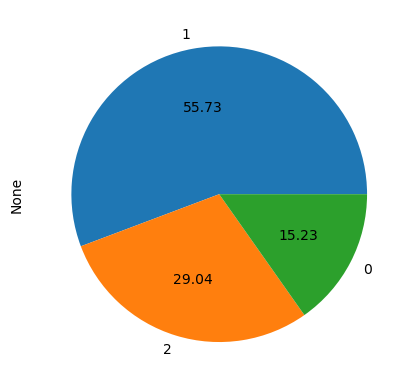

In [122]:
y.value_counts().plot.pie(autopct='%.2f')

In [123]:
!pip install imblearn


In [126]:
#from imblearn.under_sampling import RandomUnderSampler

#rus = RandomUnderSampler(sampling_strategy={'0-4': 100, '5-12': 200, '13-22': 300})
#X_res, y_res = rus.fit_resample(X, y)

#ax = y_res.value_counts().plot.pie(autopct='%.2f')
#_ = ax.set_title("Under-sampling")

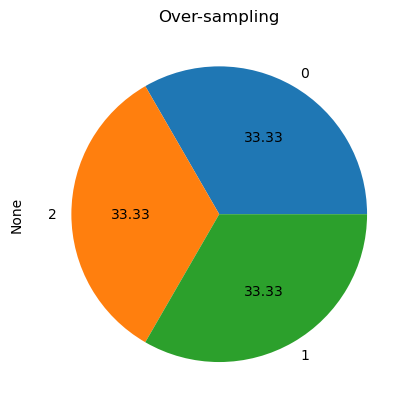

In [127]:

from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [128]:
X_encoded = pd.get_dummies(X_res, columns=['event_name',
                                       'name',
                                       'text',
                                       'fqid',
                                       'room_fqid',
                                       'text_fqid'])
X_encoded.head()

,session_id,index,elapsed_time,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,...,text_fqid_tunic.wildlife.center.coffee,text_fqid_tunic.wildlife.center.crane_ranger.crane,text_fqid_tunic.wildlife.center.expert.recap,text_fqid_tunic.wildlife.center.expert.removed_cup,text_fqid_tunic.wildlife.center.remove_cup,text_fqid_tunic.wildlife.center.tracks.hub.deer,text_fqid_tunic.wildlife.center.wells.animals,text_fqid_tunic.wildlife.center.wells.animals2,text_fqid_tunic.wildlife.center.wells.nodeer,text_fqid_tunic.wildlife.center.wells.nodeer_recap
0,20090312431273200,0,0,0,0.0,-413.991405,-159.314686,380.0,494.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,20090312431273200,1,1323,0,0.0,-413.991405,-159.314686,380.0,494.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,20090312431273200,2,831,0,0.0,-413.991405,-159.314686,380.0,494.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,20090312431273200,3,1147,0,0.0,-413.991405,-159.314686,380.0,494.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,20090312431273200,4,1863,0,0.0,-412.991405,-159.314686,381.0,494.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
sum(y)/len(y)

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_res, random_state=42)

In [ ]:
sum(y_train)/len(y_train)
#verifying stratify 

In [ ]:
X_test

In [131]:
import xgboost as xgb

clf_xgb = xgb.XGBClassifier(objective='binary:logistic', missing=None, seed=42, eval_metric='aucpr')


clf_xgb.fit(X_train, 
            y_train,
            eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:1.00000
[1]	validation_0-aucpr:1.00000
[2]	validation_0-aucpr:1.00000
[3]	validation_0-aucpr:1.00000
[4]	validation_0-aucpr:1.00000
[5]	validation_0-aucpr:1.00000
[6]	validation_0-aucpr:1.00000
[7]	validation_0-aucpr:1.00000
[8]	validation_0-aucpr:1.00000
[9]	validation_0-aucpr:1.00000
[10]	validation_0-aucpr:1.00000
[11]	validation_0-aucpr:1.00000
[12]	validation_0-aucpr:1.00000
[13]	validation_0-aucpr:1.00000
[14]	validation_0-aucpr:1.00000
[15]	validation_0-aucpr:1.00000
[16]	validation_0-aucpr:1.00000
[17]	validation_0-aucpr:1.00000
[18]	validation_0-aucpr:1.00000
[19]	validation_0-aucpr:1.00000
[20]	validation_0-aucpr:1.00000
[21]	validation_0-aucpr:1.00000
[22]	validation_0-aucpr:1.00000
[23]	validation_0-aucpr:1.00000
[24]	validation_0-aucpr:1.00000
[25]	validation_0-aucpr:1.00000
[26]	validation_0-aucpr:1.00000
[27]	validation_0-aucpr:1.00000
[28]	validation_0-aucpr:1.00000
[29]	validation_0-aucpr:1.00000
[30]	validation_0-aucpr:1.00000
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='aucpr', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=None, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=42, reg_alpha=0, ...)

In [138]:
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = clf_xgb.predict(X_test)

# compute the confusion matrix and plot it
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay.from_estimator(clf_xgb, X_test, y_test, display_labels=clf_xgb.classes_)
disp.plot(values_format='d')

XGBoostError: [14:09:45] ../src/c_api/c_api_utils.h:159: Invalid missing value: null
Stack trace:
  [bt] (0) /opt/conda/lib/python3.7/site-packages/xgboost/lib/libxgboost.so(+0xbbec9) [0x7805984d5ec9]
  [bt] (1) /opt/conda/lib/python3.7/site-packages/xgboost/lib/libxgboost.so(+0xdeb90) [0x7805984f8b90]
  [bt] (2) /opt/conda/lib/python3.7/site-packages/xgboost/lib/libxgboost.so(+0xe45d8) [0x7805984fe5d8]
  [bt] (3) /opt/conda/lib/python3.7/site-packages/xgboost/lib/libxgboost.so(XGBoosterPredictFromDense+0x330) [0x7805984de4d0]
  [bt] (4) /opt/conda/lib/python3.7/lib-dynload/../../libffi.so.8(+0x6a4a) [0x7805fa4d3a4a]
  [bt] (5) /opt/conda/lib/python3.7/lib-dynload/../../libffi.so.8(+0x5fea) [0x7805fa4d2fea]
  [bt] (6) /opt/conda/lib/python3.7/lib-dynload/_ctypes.cpython-37m-x86_64-linux-gnu.so(_ctypes_callproc+0x2f4) [0x7805fa4e9784]
  [bt] (7) /opt/conda/lib/python3.7/lib-dynload/_ctypes.cpython-37m-x86_64-linux-gnu.so(+0x10ff8) [0x7805fa4e9ff8]
  [bt] (8) /opt/conda/bin/python3.7(_PyObject_FastCallKeywords+0x47b) [0x563b98db372b]



In [139]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay.from_estimator(clf_xgb, X_test, y_test, display_labels=clf_xgb.classes_)
disp.plot(values_format='d')

NameError: name 'y_pred' is not defined